# **Relatório 01 - Autovalores e Autovetores (Algoritmo QR e Método de Francis e SVD)**
##### **Gabriel van Loon Bodê da Costa Dourado Fuentes Rojas**
##### **SME0104 - Cálculo Numérico**
##### **Docente: Cynthia de Oliveira Lage Ferreira** 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

 # **RESUMO DO RELATÓRIO**

Neste relatório iremos discorrer acerca dos métodos numéricos relacionados ao cálculo de autovalores e autovetores vistos durante a disciplina SME0104. O tópicos abordados estarão dispostos da seguinte forma:

1.  Bases Ortogonais
2.  Autovalores e Autovetores
3.  Método de Francis
4.  Compressão com Diagonalização de Matrizes
5.  Single Value Decomposition

O foco do relatório gira em torno do entendimento da importância das matrizes ortogonais e os métodos de decomposição abordados na aula. Em seguida as técnicas são utilizadas para realizar a compressão de imagens em Gray-Scale utilizando tanto o método de Francis quanto o método SVD.



# **Bases Ortogonais**

Durante o curso de Álgebra Linear, grande parte do conteúdo se dava em torno  das Operações Lineares e suas propriedades. Veremos, primeiramente, um pouco sobre bases ortogonais e os métodos numéricos existentes de ortogonalização de matrizes. Vamos então relembrar algumas das definições bastante conhecidas.

#### **Conjunto Ortonormal** 

Seja o conjunto $O = \{v_1, v_2, ... , v_n \}$, tal que $v_i \in \mathbb{R}^n$. $O$ é considerado um conjunto ortonormal se $\forall v_i, v_j \in O$ distintos vale que

a) $||v_i|| = 1$

b) $\langle v_i , v_j \rangle = 0$ para todo $i \neq j$

#### **Matrizes Ortogonais**  

Seja $A$ uma matriz em $M(n,n)$ cujas $n$ colunas e linhas formam um conjunto *ortonormal*. $A$ é dita **Ortogonal**.

#### **Base Ortogonal**

Dizemos que $B = \{v_1, v_2, ..., v_n \}$ é uma base ortogonal de $K$, um espaço de dimensão finita, se B é tanto base de $K$ quanto é conjunto ortonormal.

Não entrando em muitos detalhes, a vantagem de trabalhar com bases ortogonais se deve ao fato de que elas tornam extremamente simples o processo de cálculo de coordenadas de elementos do espaço $K$ e, por isso, foram criados os **Algoritmos de Ortogonalização** que transformam uma base $B$ qualquer em uma base $B'$ ortogonal.

#### **Processo de Ortogonalização de Gram-Schmidt**

O Processo de Gram-Schmidt se trata de um processo iterativo que gera uma base ortogonal $B'$ a partir de uma base $B$ ao gerar, à cada novo passo, um novo vetor que corresponda ao $i$-ésimo elemento da base $B$ subtraído das $i-1$ projeções dos vetores já adicionados nas iterações anteriores. Logo, seja $B = \{a_1, a_2, ... , a_n\}$

$ v_1 = (a_1) \div ||a_i|| $

$ v_2 = (a_2 - proj_{v_1}a_2) \div ||(a_2 - proj_{v_1}a_2)|| $

$ v_3 = (a_3 - proj_{v_1}a_3 - proj_{v_2}a_3) \div ||(a_3 - proj_{v_1}a_3 - proj_{v_2}a_3)||$

...

$ v_n = (a_n - proj_{v_1}a_n - ... - proj_{v_{n-1}}a_n) \div ||(a_n - proj_{v_1}a_n - ... - proj_{v_{n-1}}a_n)|| $

Após o fim das $n$ iterações terminaremos então com um novo conjunto $B' = \{v_1, v_2, ... , v_n\}$ que é uma base ortogonal.

#### **Decomposição QR**

A Decomposição QR se trata de um método de fatoração de matriz que permite que dada uma matriz $A \in \mathbb{R}^{mxn}$ com $m \geq n$, a mesma possa possa ser expressa pelo produto da matriz ortogonal $Q \in \mathbb{R}^{mxn}$ e da matriz diagonal superior $R \in \mathbb{R}^{nxn}$

\begin{equation}
A = QR
\end{equation}

Existem diferentes métodos utilizados para o cálculo de $Q$ e $R$, dentre elas as utilizando as Reflexões de Householder, Rotações de Givens e também utilizando o Método de Gram-Schmidt e cada um possui suas vantagens e desvantagens. A seguir, no entanto, iremos estar utilizando o algoritmo de Gran-Schmidt para encontrar a nossa matriz $Q$ ortogonal para que possamos então calcular os valores de $R$.

*(Obs: por definição, matrizes ortogonais são sempre quadradas. Porém, na versão reduzida do algoritmo QR iremos continuar nos referindo à $Q \in \mathbb{R}^{mxn}$ como matriz ortogonal por simplicidade).*


#### **Decomposição QR + Gran-Schmidt**

O uso da decomposição junto do processo de Gran-Schmidt é uma das formas mais conhecidas para realizar o algoritmo QR devido à fácil interpretabilidade do mesmo utilizando sua interpretação geométrica.

O algoritmo consiste, portanto, em utilizar os passos já mostrados anteriormente para encontrar $B' = \{ v_1, v_2, ..., v_n \}$ e utilizar os vetores $v_i$ como vetores colunas da matriz $Q$. tal que:

\begin{equation}
Q = ( v_1 | v_2 | ... | v_n )
\end{equation}

Com isso, podemos encontrar os valores da matriz $R$ devido à propriedade das matrizes ortogonais de que $Q^TQ = I$. Teremos então que:

\begin{equation} A = QR \end{equation}

\begin{equation} Q^TA = Q^TQR = IR \end{equation}

\begin{equation} Q^TA = R \end{equation}

Portanto, podemos calcular os valores de $R$ resolvendo o sistema acima.

(*Obs: um outro detalhe apontado pelas fontes que pesquisei era de que R também possuia solução única se embutida a restrição de que a diagonal de R contesse apenas elementos positivos, acredito que se deva ao fato de forçar os vetores ortogonais encontrados à um sentido positivo e por isso não fui mais à fundo.*)

Vamos ver a seguir a implementação padrão do algoritmo QR em numpy

In [ ]:
def QR_decomposition(A):
  '''
  Calcula a decomposição QR utilizando Gran-Schmidt na versão reduzida 
  da matriz A e retorna Q e R ao usuário.
  '''
  (m,n) = A.shape
  Q = np.zeros((m,n))
  R = np.zeros((n,n))
  
  # Para cada nova iteração, um novo vetor v_j normalizado é adicionado à Q[:,j]
  for j in range(0,n):
    V_column = A[:,j]  # V_i = A_i
    V_row    = np.reshape(V_column,(1,m))

    # Cada iteração calcula a projeção de a_j com os vetores já inseridos(q_i) e
    # vai subtraindo os valores de v_j.
    for i in range(0,j):
      # Calcula a projeção de a_j em q_i:  r_ij = q_i * a_j
      R[i,j] = np.dot( Q[:,i].T, A[:,j].T )
      # Subtrai a projeção anterior de v_j
      V_row = V_row - np.dot(R[i,j], Q[:,i])

    # Os valores da diagonal de R indical a norma de v_j
    R[j,j]   = np.linalg.norm(V_row)
    # Atualiza Q com o valor final do vetor v_j normalizado e ortogonalizado.
    Q[:,j]   = np.divide(V_row, R[j,j])
  return (Q,R)

Vamos agora testar nossa função em uma pequena matriz de teste para ver os resultados obtidos.

In [ ]:
A = np.array( [[4.0,4.0], [5.0,2.0], [2.0,2.0]])
(Q,R) = QR_decomposition(A)
print(Q)
print(R)

[[ 0.59628479  0.66666667]
 [ 0.74535599 -0.66666667]
 [ 0.2981424   0.33333333]]
[[6.70820393 4.47213595]
 [0.         2.        ]]


Apenas por critério de testes, vamos também executar a mesma matriz acima na função já existente na biblioteca `numpy.linalg` e verificar se os resultados obtidos em ambos são semelhantes ou não.

In [ ]:
(Q,R) = np.linalg.qr(A)
print(Q)
print(R)

[[-0.59628479  0.66666667]
 [-0.74535599 -0.66666667]
 [-0.2981424   0.33333333]]
[[-6.70820393 -4.47213595]
 [ 0.          2.        ]]


Como podemos ver, os resultados obtidos pela biblioteca são semelhantes com a função `QR_decomposition`, contendo apenas alguns  dos vetores com sentidos opostos mas com os mesmos valores absolutos (importante lembrar que vetores ortogonais continuam ortogonais mesmo que tenham suas orientações invertidas).

Abaixo vamos substituir a nossa versão pela decomposição de Gran-Schmidt modificada. Nessa versão a matriz $V$ ja é inicializada como uma cópia de $A$ e os vetores já normalizados $v_i$ são utilizados para calcular as projeções no lugar de $a_i$. Além disso, ao invés da projeção ser calculada com os vetores já inseridos, ela é descontada dos vetores $v_i$ que ainda não foram inseridos em Q.

*Obs: Essa versão executa o mesmo número de flops da anterior porém é numéricamente mais estável devido ao fato das projeções serem feitas com vetores normalizados.*

In [ ]:
def QR_decomposition_mod(A):
  '''
  Calcula a decomposição QR utilizando Gran-Schmidt na versão reduzida 
  da matriz A e retorna Q e R ao usuário.
  '''
  (m,n) = A.shape
  V = A.copy()
  Q = np.zeros((m,n))
  R = np.zeros((n,n))
  
  # Para cada nova iteração, um novo vetor v_j normalizado é adicionado à Q[:,j]
  for j in range(0,n):
    V_j    = np.reshape(V[:,j],(1,m))
    R[j,j] = np.linalg.norm(V_j)        
    Q[:,j] = np.divide(V_j, R[j,j])

    for i in range(j+1,n):
      R[j,i] = np.dot( Q[:,j].T, V[:,i].T )
      V[:,i] = V[:,i] - np.dot(R[j,i], Q[:,j])

  return (Q,R)

In [ ]:
(Q,R) = QR_decomposition_mod(A)
print(Q)
print(R)

[[ 0.59628479  0.66666667]
 [ 0.74535599 -0.66666667]
 [ 0.2981424   0.33333333]]
[[6.70820393 4.47213595]
 [0.         2.        ]]


# **Autovalores e Autovetores**

*A busca por autovalores e autovetores é um dos tópicos mais importantes de um curso de Álgebra Linear, e um de seus papeis se trata do estudo de Operadores Lineares Diagonalizáveis. Vamos reintroduzir alguns conceitos que são importantes para o bom entendimento dos algoritmos das próximas sessões.*

**1. Autovalores:** 
Seja $A$ uma matriz em $M(n,n)$. Um escalar $\lambda \in \mathbb{C}$ é considerado um **autovalor** de $A$ se existir um vetor $v \in \mathbb{R}^n$ com $v \ne 0$  tal que 

\begin{equation}
Av = \lambda v 
\end{equation}

Sendo $v$ também chamado de autovetor associado à $\lambda$.

**2. Espectro:** 
O espectro de $A \in M(n,n)$ se trata do conjunto formado pelos seus **autovalores**, i.e.

\begin{equation}
\Lambda (A) = \{ \lambda_1, ... , \lambda_n \}
\end{equation}

**3. Matrizes Semelhantes:** 
Dizemos que $A$ e $B$ são **semelhantes** se existir $P \in M(n,n)$ invertível tal que

\begin{equation}
B = P^{-1} A P
\end{equation}

Além disso, se $A$ e $B$ são **semelhantes** então possuem o mesmo **espectro**, i.e, $\Lambda (A) = \Lambda (B)$, .

Como já visto em Álgebra Linear, umas das formas de encontrar os autovalores de $A$ se deve através do cálculo do polinômio característico de $A$ dado da seguinte forma:

\begin{equation} p(\lambda) = det(A - \lambda I) \end{equation}

O grande problema dessa técnica, se tratando de algoritmos computacionais, se deve à necessidade da utilização de raízes em números flutuantes que geram alguns resultados instáveis, principalmente quando a matriz A é de uma ordem $n$ muito grande.

Com isso em mente, veremos mais adiante alguns métodos numéricos existentes para o cálculo dos autovalores e seus autovetores associados.

# **Método de Francis**

Voltando agora aos algoritmos numéricos, o Método de Francis se trata de um algoritmo extremamente simples capaz de calcular os autovalores e autovetores de uma matriz $A$ desde que a mesma seja **quadrada** e **simétrica**.

*(Obs: existem algumas situações em que o método de Francis não converge para o resultado, elas no entanto são raras e não vi muitos materiais se aprofundando o suficiente neste tema)*

O Algoritmo de Francis consiste, basicamente, em iterar a decomposição $QR$ diversas vezes na matriz $A$ até que ela se torne uma matriz diagonal.

$repete(condicao):$
  
  $\space \space \space (Q,R) = decomposicao(A_{k-1})$

  $\space \space \space A_k = R \space Q$

Além disso, é garantido que $A_k$ possui os autovalores da diagonal em grandeza absoluta decrescente, ou seja, $|\lambda_1| \geq |\lambda_2| \geq ... \geq |\lambda_n| $.

Por fim, o algoritmo também permite o computo dos autovetores $v_i$ associados aos autovalores $\lambda_i$ encontrados por meio da iteração $V = Q_1 Q_2 Q_3 ... Q_{k-1}$


**Por que $A_0$ e $A_k$ possuem os mesmos autovalores?**

Podemos perceber que $A_0$ e $A_k$ são matrizes semelhantes ao expandirmos os passos de iterações e percebendo que possuem uma estrutura do tipo $A_k = P^TA_0P$ em que $P = (Q_1Q_2Q_3...Q_{k-1})$

**Por que $A_0$ sempre converge para uma matriz diagonal?**

*(Não consegui encontrar no Golub nada que indicasse o motivo de tal convergência)...*

Vamos então escrever nosso algoritmo e compará-lo com o já existente na biblioteca `numpy.linalg`

In [ ]:
def francis_method(A, k_max = 300, tol = 1e-8, use_linalg = False, debug = False, return_full = False): 
  A_k   = A.copy()
  V     = np.eye(A.shape[0]) 
  err   = 999999999.0 

  # Realizando a recursão do algoritmo até k_max vezes
  for k in range(1, k_max):
    if debug and (k % 10 == 0):
      print(k, '-ésima iteração. Erro: ', err)

    Q = R = None

    # Dependendo da flag utiliza o QR implementado ou o do np.linalg
    if use_linalg:
      Q,R = np.linalg.qr(A_k)
    else:
      Q,R = QR_decomposition_mod(A_k)

    A_k = R @ Q
    V   = np.dot(V,Q)

    # Se todos os elementos fora da diagonal já forem próximos de 
    # 0 o suficiente, pode abortar o restante das iterações.
    err = abs(np.tril(A_k, -1)).max()
    if err < tol:
      break

  # Se return_full é verdadeiro, retorna D inteira e não só sua diagonal.
  if return_full:
    return (A_k, V)
    
  return (np.diagonal(A_k), V)

Repare que inserimos uma flag que permite utilizar tanto a decomposição QR implementada por nós quanto a já disponível na biblioteca `numpy.linalg`.

Abaixo testamos o método implementado em uma matriz $A_{3x3}$ 

In [ ]:
A = np.array( [[12.55 ,3.0 ,-44.0], 
               [3.0   ,33.7,22.0], 
               [-44.0  ,22.0,0.55]])

(D,V) = francis_method(A)
for i in range(0, A.shape[0]):
  print('lambda({:.8f}) = {}'.format(D[i], V[:,i]))

lambda(58.11193144) = [ 0.58291452 -0.50325797 -0.63792012]
lambda(-42.46981181) = [-0.61410212  0.24122883 -0.75145674]
lambda(31.15788037) = [-0.53206132 -0.82978314  0.168436  ]


Comparando com os resultados obtidos com o método implementado pela biblioteca `numpy.linalg` teremos os seguintes resultados:

In [ ]:
(D, V) = np.linalg.eig(A)
for i in range(0, A.shape[0]):
  print('lambda({:.8f}) = {}'.format(D[i], V[:,i]))

lambda(-42.46981181) = [ 0.61410212 -0.24122883  0.75145674]
lambda(58.11193144) = [-0.58291452  0.50325797  0.63792012]
lambda(31.15788037) = [ 0.53206132  0.82978314 -0.168436  ]


Podemos ver facilmente que os autovalores e autovetores encontrados são iguais, com a exceção de que utilizando o método de Francis os autovalores são dispostos em ordem decrescente dos valores absolutos enquanto a biblioteca os retorna de forma não ordenada (provavelmente devido ao fato de ela estar utilizando algum outro algoritmo por trás).

# **Compressão com Diagonalização de Matrizes**

Com tudo o que já fizemos até agora, sabemos que uma matriz simétrica $A \in M(n,n)$ pode ser diagonalizada por meio do método de Francis de tal forma que

$D = A_k = V^TA_0V$

Ajustamos a equação de forma à isolar a matriz inicial, chegamos na seguinte equaçãão

$A_0 = V D V^T$

Sabemos que $D$, no cenário ideal, se trata de uma matriz diagonal cujos elementos representam os autovalores de $A_k$ e que $V$ é uma ortogonal composta pelos autovetores associados aos autovalores de $D$.

Expandindo a equação, chegamos nos seguintes resultados

$\forall a_{ij} \in A$, $a_{ij}$ pode pode ser escrito como resultado de:

$a_{ij} = \lambda_1 v_{i1} v_{i1} + \lambda_2 v_{i2} v_{i2} + ... + \lambda_n v_{in} v_{in}$

Como sabemos que $|\lambda_i| > |\lambda_{i-1}|$, podemos inferir que os primeiros autovalores serão aqueles que trarão o maior impacto no valor final de $a_{ij}$, enquanto valores muito próximos de $n$ farão o oposto com impacto quase nulo (isso se esteverem próximos de zero, se todos os elementos da diagonal forem valores grandes então a suposição não se aplica).

É com esta ideia em mente que podemos pensar em compressão de matrizes e, a partir de agora, iremos aplicar isso em imagens para ter um feedback visual mais interessante.

In [ ]:
from PIL import Image
import requests
from io import BytesIO

Primeiro precisamos pegar alguma imagem que utilizaremos para fazer os testes. A imagem pode ser obtida diretamente pela internet e será convertida para Gray-Scale.

Como já vimos anteriormente, o **Algoritmo de Francis** demanda que a matriz $A$ seja **simétrica** e **quadrada**. Por hora, vamos apenas nos preocupar em buscar uma imagem quadrada na internet e o restante conseguimos ajustar via código facilmente.

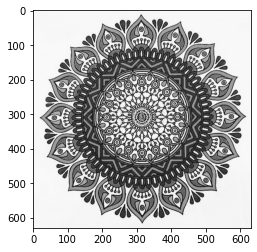

In [ ]:
response = requests.get('https://static.todamateria.com.br/upload/ma/nd/mandala-cke.jpg')
simetric_img = Image.open(BytesIO(response.content)).convert('LA')
plt.imshow(simetric_img)

A seguir, vamos transformar os pixeis da imagem em um array da biblioteca `numpy` e, em seguida, forçar a imagem para ser simétrica copiando os pixeis que não pertencem à diagonal ($a_{ji}=a_{ij}$).

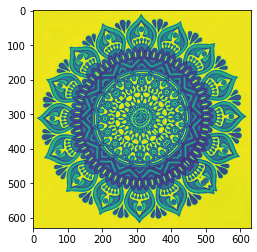

In [ ]:
img          = np.asarray(simetric_img)[:,:,0].copy()
for i in range(0, img.shape[0]):
  for j in range(i+1, img.shape[0]):
    img[j,i] = img[i,j]

img_original = img.copy()

img = (img/255.0)
plt.imshow(img)

Com nossa matriz simétrica em mãos, vamos executar o Método de Francis criado acima para buscar tanto os autovalores $D$ quanto os autovetores $V$ associados à A. 

In [ ]:
(D,V) = francis_method(img, k_max=100, use_linalg=True, debug=True, return_full=True)

10 -ésima iteração. Erro:  48.2637659692801
20 -ésima iteração. Erro:  18.755438797988006
30 -ésima iteração. Erro:  14.826786007198985
40 -ésima iteração. Erro:  13.609551394217586
50 -ésima iteração. Erro:  13.873252215200989
60 -ésima iteração. Erro:  17.401907906529736
70 -ésima iteração. Erro:  18.090163492622185
80 -ésima iteração. Erro:  16.5156113205682
90 -ésima iteração. Erro:  14.607470916825195


*Como podemos ver, a partir de 20 iterações na imagem acima o algoritmo chega em uma espécia de platô e não consegue melhorar mais. Apesar de não ter tido tempo de investigar muito mais a fundo, acredito que seja devido ao fato do $rank(A) < n$, uma vez que a imagem claramente apresenta algumas colunas identicas e, portanto, logo após a primeira iteração do algoritmo QR alguns valores devem ter ficado muito próximos de $0$. Mas isso é apenas conjectura e não consegui me aprofundar mais à fundo.* 

A seguir, tentamos fazer a reconstrução da imagem $A$ utilizando-se da fórmula $A_0 = V D V^T$

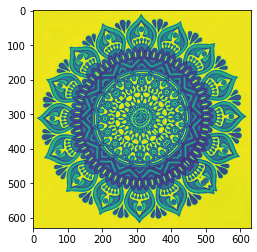

In [ ]:
D_matrix  = D
img_recon_full = (V @ D_matrix @ V.T)
img_recon_full = img_recon_full * 255.0
plt.imshow(img_recon_full)

E agora, vamos também reconstruir a imagem. Essa vez no entanto iremos utilizar apenas os 200 primeiro autovalores da matriz $D$.

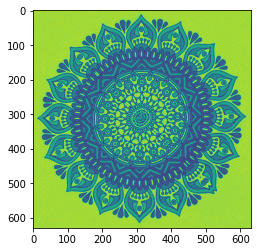

In [ ]:
D_redux = D.copy()
D_redux[200:, 200:] = 0

D_matrix  = D_redux
img_recon_redux = (V @ D_matrix @ V.T)
img_recon_redux = img_recon_redux * 255.0

plt.imshow(img_recon_redux)

Por fim, vamos comparar lado a lado as 3 imagems utilizando a biblioteca de `matplotlib`.

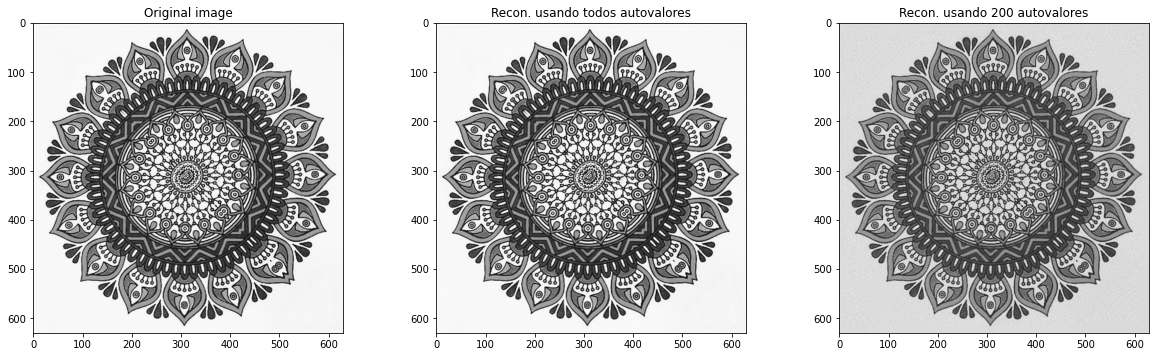

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,12))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.imshow(img_original, cmap='gray')
ax1.set_title("Original image")

ax2.imshow(img_recon_full, cmap='gray')
ax2.set_title("Recon. usando todos autovalores")

ax3.imshow(img_recon_redux, cmap='gray')
ax3.set_title("Recon. usando 200 autovalores")
plt.show()

Abaixo encapsulamos todas as ações feitas em uma única função e à executamos em algumas outras imagens.

In [ ]:
def compress_compare(url = '', n_autovalores = 60, k_max = 100):
  print('Baixando imagem da internet...')
  response     = requests.get(url)
  simetric_img = Image.open(BytesIO(response.content)).convert('LA')

  print('Tornando imagem simétrica...')
  img = np.asarray(simetric_img)[:,:,0].copy()
  for i in range(0, img.shape[0]):
    for j in range(i+1, img.shape[0]):
      img[j,i] = img[i,j]

  if img.shape[0] != img.shape[1]:
    print('Atenção! A imagem requerida deve ser quadrada!')
    return

  # Cópia para comparação final
  img_original = img.copy()
  
  print('Executando método de Francis (pode demorar)...')
  img = (img / 255.0)
  (D,V) = francis_method(img, k_max=k_max, use_linalg=True, debug=False, return_full = True)

  print('Reconstruindo com todos os autovalores')
  D_matrix  = D
  img_recon_full = (V @ D_matrix @ V.T) * 255.0

  print('Reconstruindo com os {} primeiros autovalores'.format(n_autovalores))
  D_redux = D.copy()
  D_redux[n_autovalores:,n_autovalores:] = 0

  D_matrix  = D_redux
  img_recon_redux = (V @ D_matrix @ V.T) * 255.0

  print('Exibindo resultados finais: ')
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,12))
  plt.subplots_adjust(wspace=0.3, hspace=0.2)

  ax1.imshow(img_original, cmap='gray')
  ax1.set_title("Original image")

  ax2.imshow(img_recon_full, cmap='gray')
  ax2.set_title("Recon. usando todos autovalores")

  ax3.imshow(img_recon_redux, cmap='gray')
  ax3.set_title("Recon. usando {} autovalores".format(n_autovalores))
  plt.show()

Baixando imagem da internet...
Tornando imagem simétrica...
Executando método de Francis (pode demorar)...
Reconstruindo com todos os autovalores
Reconstruindo com os 50 primeiros autovalores
Exibindo resultados finais: 


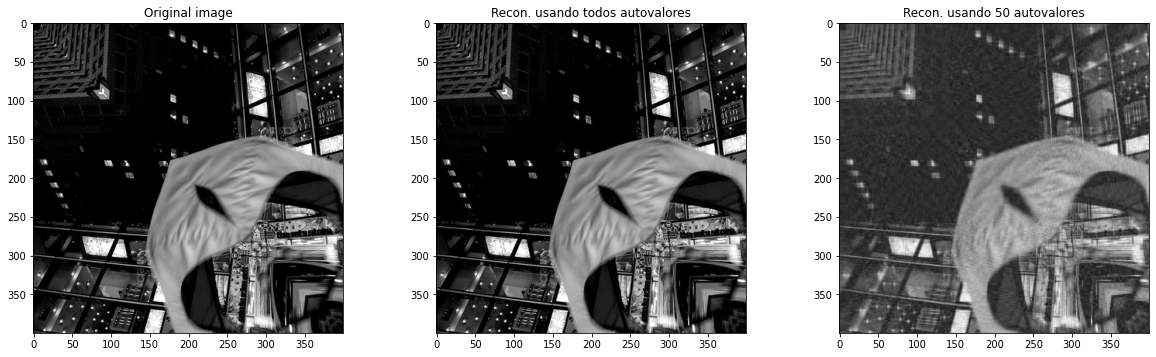

In [ ]:
compress_compare('https://onlinequadros.com.br/static/acc/artist/ART-52/gallery/98/ART-52_XEafoa4FvIuP1AKcuCGc.jpg', n_autovalores=50, k_max=300)

Baixando imagem da internet...
Tornando imagem simétrica...
Executando método de Francis (pode demorar)...
Reconstruindo com todos os autovalores
Reconstruindo com os 50 primeiros autovalores
Exibindo resultados finais: 


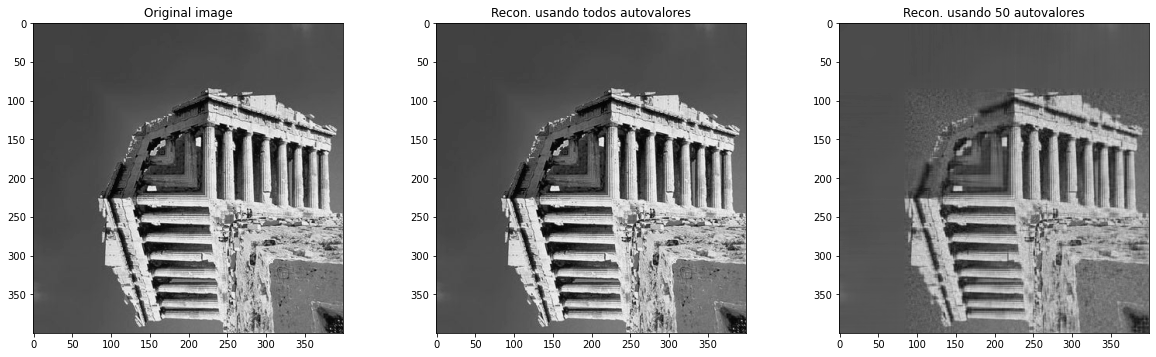

In [ ]:
compress_compare('https://i.pinimg.com/originals/a5/9e/a8/a59ea85f9514d2b97e40987e6e335b2d.jpg', n_autovalores=50, k_max=300)

Baixando imagem da internet...
Tornando imagem simétrica...
Executando método de Francis (pode demorar)...
Reconstruindo com todos os autovalores
Reconstruindo com os 100 primeiros autovalores
Exibindo resultados finais: 


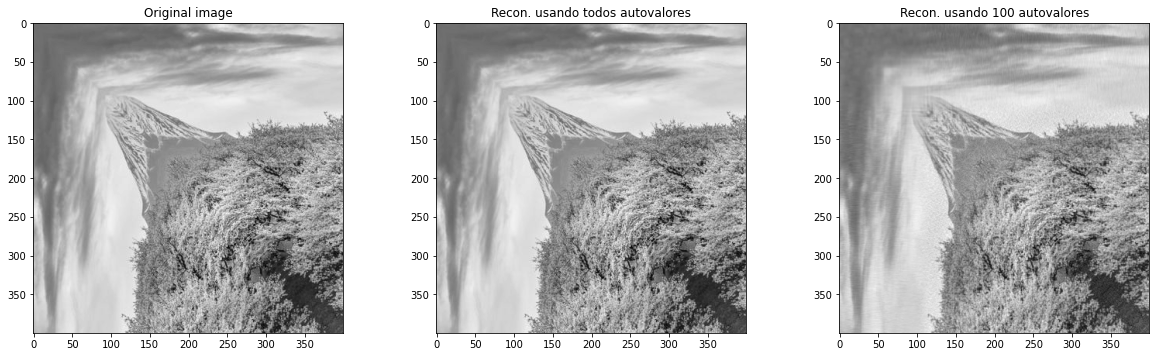

In [ ]:
compress_compare('https://d3hne3c382ip58.cloudfront.net/resized/400x400/wildlife-landscapes-and-nature-tours-in-japan-400X400_.JPG', n_autovalores=100, k_max=300)

O método de compressão acima é interessante por permitir que a imagem possa ser armazenada guardando apenas os $k$ primeiros autovalores e autovetores mais influentes de $A$. Essa técnica, no entanto, possui o inconveniente de limitar que $A$ seja sempre quadrada e simétrica (o que nas maiorias das vezes não é verdade).

Custo de memória inicial: $600 \times 600 = 360,000$

Custo de memória final: $k \times (600 + 600)$

Fazendo $k = 200$ teremos $200 \times (600 + 600) = 240,000 \Rightarrow 0.33 $ de economia de espaço.

Vamos então analisar o próximo, e último algoritmo, que permitirá a decomposição de $A$ mesmo não encaixando nos critérios anteriores.

# **Single Value Decomposition**

Como vimos anteriormente, a decomposição de matrizes em seus seus autovalores permite que consigamos decompor uma matriz $A$ em duas outras matrizes, uma diagonal `D` e outra ortogonal $V$.

Resumidamente, o algoritmo SVD se utiliza de uma propriedade de matrizes de que, seja $A$ uma matriz qualquer, a multriplicação $A' = A A^T$ sempre irá gerar uma matriz simétrica.

Com isso, teremos que dado $A \in M(m,n)$ com $m \geq n$ e com $rank(A) > 0$, é possível realizar a seguinte decomposição:

\begin{equation} A = U \Sigma V^T \end{equation} 

Onde $\Sigma$ é uma matriz diagonal cujos elementos são chamados **valores singulares** e valem a raíz dos autovalores de $A$ ($\sigma_i = \lambda_i^2$). Já $U$ e $V$ são matrizes ortogonais distintas (ao contrário do que ocorria com Francis). 

A seguir implementamos o método mais simples utilizando nossa função de Francis e, em seguida, fazemos alguns testes já utilizando a função da biblioteca `numpy.linalg`

In [ ]:
def SVD(A,  k_max = 300, tol = 1e-8, return_full=False):
  (m,n) = A.shape
  k     = min(m,n)
  S     = np.zeros((m,n))

  _,U = francis_method( A @ A.T, k_max=k_max, tol=tol, use_linalg=True)
  D,V = francis_method( A.T @ A, k_max=k_max, tol=tol, use_linalg=True, return_full=True)

  np.fill_diagonal(S[:k,:k], np.sqrt(np.diagonal(D)))

  if return_full:
    return U,S,V
  return U,np.diagonal(S),V


In [ ]:
A = np.array( [[12.55 ,3.0 ,-44.0], 
               [3.0   ,33.7,22.0], 
               [-44.0 ,22.0,0.55],
               [133.0 ,34.0,12.55],
               [412.0 ,23.0,0.55]])

U, S, V = SVD(A)
print(S)
print(U)
print(V)

[436.43259973  58.66942278  38.88167592]
[[-0.02838531  0.53144205  0.80385043 -0.06841798 -0.25672376]
 [-0.01267033 -0.6601107   0.25490377 -0.57213568 -0.41446129]
 [ 0.09701551 -0.29841594  0.46082261 -0.05270517  0.82849297]
 [-0.30967592 -0.42701053  0.26806221  0.77634088 -0.21725632]
 [-0.945369    0.10214274 -0.06807155 -0.24999348  0.16945157]]
[[ 0.99750077 -0.05300847  0.0467152 ]
 [ 0.07022911  0.67131443 -0.73783793]
 [ 0.00775107  0.73927467  0.6733594 ]]


In [ ]:
U, S, V = np.linalg.svd(A)
print(S)
print(U)
print(V)

[436.43259973  58.66942278  38.88167592]
[[-0.02838531 -0.53144205 -0.80385043 -0.10924167 -0.24218664]
 [-0.01267033  0.6601107  -0.25490377 -0.63190128 -0.31594013]
 [ 0.09701551  0.29841594 -0.46082261  0.08267817  0.82604041]
 [-0.30967592  0.42701053 -0.26806221  0.73069631 -0.34057068]
 [-0.945369   -0.10214274  0.06807155 -0.21912156  0.20783724]]
[[-0.99750077 -0.07022911 -0.00775107]
 [-0.05300847  0.67131443  0.73927467]
 [ 0.0467152  -0.73783793  0.6733594 ]]


Como podemos ver, os resultados obtidos pelos dois métodos são bastante semelhantes.

Por fim, vamos testar a compressão de imagens utilizando o método SVD.

In [ ]:
def compress_compare_SVD(url = '', n_singlevalues = 60, k_max = 100):
  print('Baixando imagem da internet...')
  response  = requests.get(url)
  img       = Image.open(BytesIO(response.content)).convert('LA')
  img       = np.asarray(img)[:,:,0].copy()

  # Cópia para comparação final
  img_original = img.copy()
  img = (img / 255.0)

  print('Executando SVD...')
  (U, S_temp, V) = np.linalg.svd(img, full_matrices=True)
  
  S = np.zeros(img.shape)
  np.fill_diagonal(S, S_temp)


  print('Reconstruindo com todos os valores singulares')
  S_matrix  = S
  img_recon_full = (U @ S_matrix @ V) * 255.0

  print('Reconstruindo com os {} primeiros valores singulares'.format(n_singlevalues))
  S_redux = S.copy()
  S_redux[n_singlevalues:,n_singlevalues:] = 0

  S_matrix  = S_redux
  img_recon_redux = (U @ S_matrix @ V) * 255.0

  print('Exibindo resultados finais: ')
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,12))
  plt.subplots_adjust(wspace=0.3, hspace=0.2)

  ax1.imshow(img_original, cmap='gray')
  ax1.set_title("Original image")

  ax2.imshow(img_recon_full, cmap='gray')
  ax2.set_title("Recon. usando todos os single values")

  ax3.imshow(img_recon_redux, cmap='gray')
  ax3.set_title("Recon. usando {} single values".format(n_singlevalues))
  plt.show()

Baixando imagem da internet...
Executando SVD...
Reconstruindo com todos os valores singulares
Reconstruindo com os 50 primeiros valores singulares
Exibindo resultados finais: 


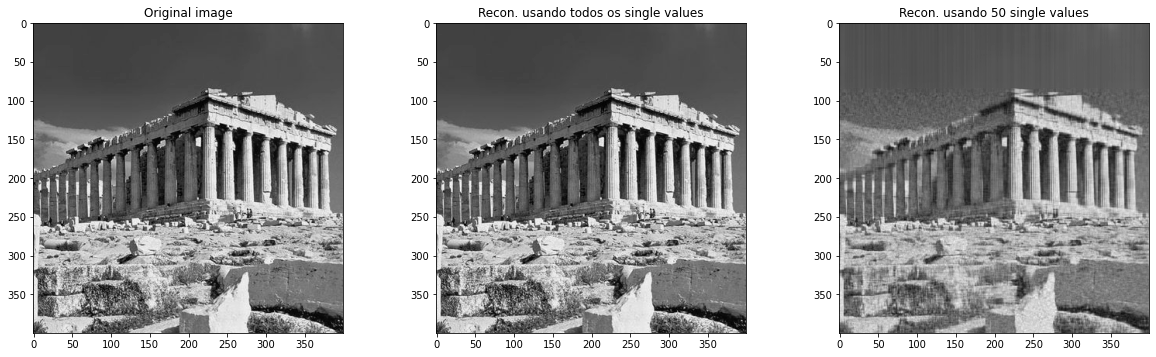

In [ ]:
compress_compare_SVD('https://i.pinimg.com/originals/a5/9e/a8/a59ea85f9514d2b97e40987e6e335b2d.jpg', n_singlevalues=50, k_max=300)

Baixando imagem da internet...
Executando SVD...
Reconstruindo com todos os valores singulares
Reconstruindo com os 50 primeiros valores singulares
Exibindo resultados finais: 


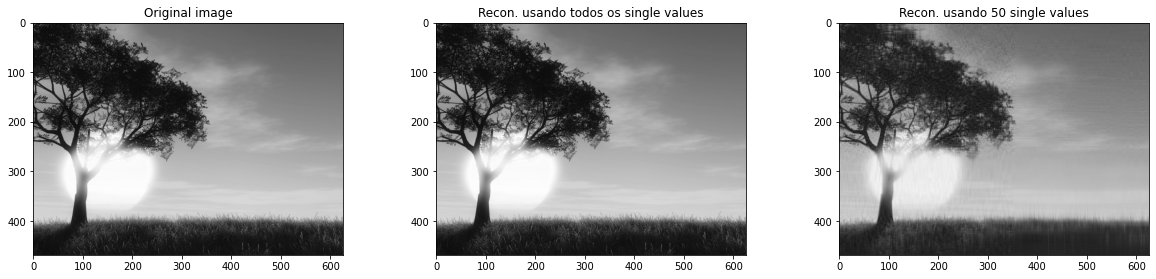

In [ ]:
compress_compare_SVD('https://img.freepik.com/fotos-gratis/arvore-3d-contra-um-ceu-do-por-do-sol_1048-9754.jpg?size=626&ext=jpg', n_singlevalues=50, k_max=300)

Baixando imagem da internet...
Executando SVD...
Reconstruindo com todos os valores singulares
Reconstruindo com os 50 primeiros valores singulares
Exibindo resultados finais: 


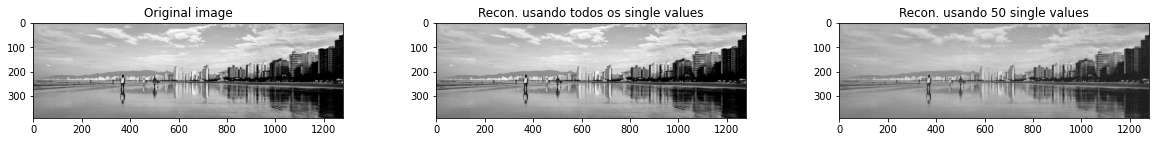

In [ ]:
compress_compare_SVD('http://www.praiagrande.sp.gov.br/imagens/upload/1376.jpg', n_singlevalues=50, k_max=300)

# **Conclusões**

Neste relatório colocamos em prática o que foi visto do assunto de Ortogonalização, Algoritmo QR e SVD, colocando em prática os algoritmos vistos em aula e comparando-os com os implementados pela biblioteca do `numpy`. 

